In [1]:
# import required libraries
import pandas as pd
import numpy as np

# read dataset
dataset = pd.read_csv("news.csv")
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
# find more about the dataset like number of instances etc
len(dataset)

6335

In [3]:
# find label
label = dataset.label
label.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [4]:
# split dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset['text'], label, test_size = 0.2, random_state = 0)

In [5]:
# train model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

tfidf_train = tfidf_vector.fit_transform(x_train)
tfidf_test = tfidf_vector.transform(x_test)

In [6]:
# passive aggressive classifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

# now predict
y_pred = pac.predict(tfidf_test)

# accuracy score
score = accuracy_score(y_test, y_pred)
score

0.936069455406472

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test, labels=['FAKE','REAL'])
cm

array([[570,  36],
       [ 45, 616]], dtype=int64)

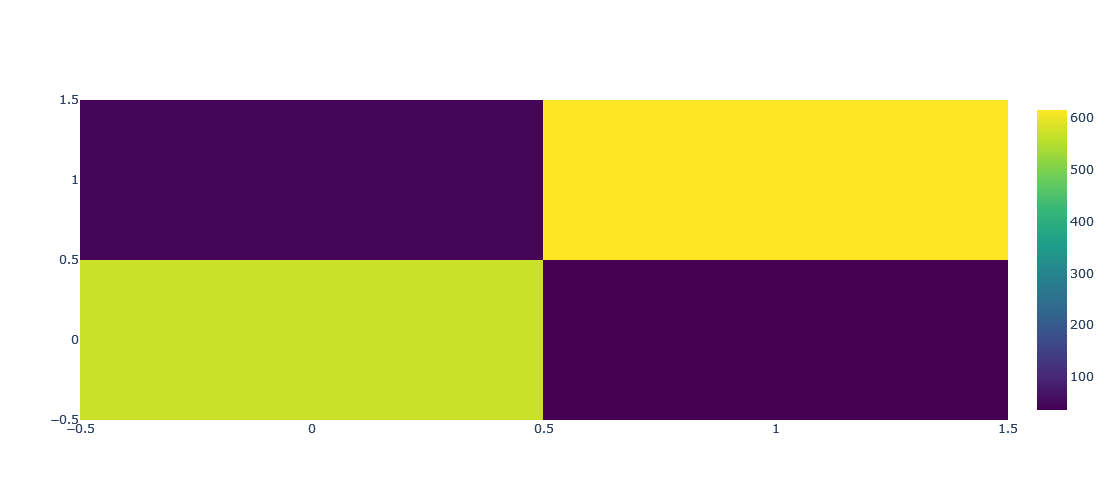

In [17]:
# confusion matrix in plotly
from plotly import graph_objects as go
fig = go.Figure(data = go.Heatmap(z = cm, colorscale = 'Viridis'))
fig.update_layout(xaxis = dict(title = ''), yaxis = dict(title = ''), width = 500, height = 500)
fig.show()